In [1]:
import pandas as pd
import numpy as np
from datafactory import DataSet
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,8)

In [43]:
target = "thermal_consumption_kwh"
dset = DataSet(start_date="2022-01-01", target=target, scale_target=False, scale_variables=False, time_features=False, dynamic_price=False, demand_price=0.5, feedin_price=0.5).pipeline()
#df = dset[["i_temp1", "i_temp2", "i_temp3", "i_power", "i_metercons", "i_meterfeed", "i_m1sum", "i_m2sum", "power_consumption_kwh", "thermal_consumption_kwh", "date", "kwh_eq_state"]]
# df[[ "i_metercons", "i_meterfeed", "i_m1sum", "i_m2sum","i_power" ,"power_consumption", "thermal_consumption"]] *= 1000
df = dset[["date","i_temp1", "i_temp2", "i_temp3", "i_power", "i_m1sum", "power_consumption_kwh", "i_metercons", "i_meterfeed", "thermal_consumption_kwh", "kwh_eq_state", "power_consumption", "thermal_consumption",]]

In [44]:
df.head(50)

,date,i_temp1,i_temp2,i_temp3,i_power,i_m1sum,power_consumption_kwh,i_metercons,i_meterfeed,thermal_consumption_kwh,kwh_eq_state,power_consumption,thermal_consumption
0,2022-01-01 00:15:00,55.7,55.7,29.8,0.004,0.000,0.000,-0.002,0.000,0.042759,9.922370,0.000000,0.000043
1,2022-01-01 00:30:00,55.6,55.5,29.3,0.000,0.000,0.000,0.000,0.000,0.155037,9.767333,0.000000,0.000155
2,2022-01-01 00:45:00,55.5,55.2,28.4,0.000,0.000,0.000,0.000,0.000,0.251935,9.515398,0.000000,0.000252
3,2022-01-01 01:00:00,55.4,55.0,28.4,0.000,0.000,0.000,0.000,0.000,0.058139,9.457259,0.000000,0.000058
4,2022-01-01 01:15:00,55.3,54.9,28.5,0.000,0.000,0.000,0.000,0.000,0.019380,9.437880,0.000000,0.000019
5,2022-01-01 01:30:00,55.2,54.8,28.5,0.000,0.000,0.000,0.000,0.000,0.038759,9.399120,0.000000,0.000039
6,2022-01-01 01:45:00,55.1,54.6,28.5,0.000,0.000,0.000,0.000,0.000,0.058139,9.340981,0.000000,0.000058
7,2022-01-01 02:00:00,55.0,54.5,28.6,0.000,0.000,0.000,0.000,0.000,0.019380,9.321602,0.000000,0.000019
8,2022-01-01 02:15:00,55.0,54.4,28.6,0.000,0.000,0.000,0.000,0.000,0.019380,9.302222,0.000000,0.000019
9,2022-01-01 02:30:00,54.8,54.3,28.6,0.000,0.000,0.000,0.000,0.000,0.058139,9.244083,0.000000,0.000058


In [45]:
df.isna().sum()

date                       0
i_temp1                    0
i_temp2                    0
i_temp3                    0
i_power                    0
i_m1sum                    0
power_consumption_kwh      0
i_metercons                0
i_meterfeed                0
thermal_consumption_kwh    0
kwh_eq_state               0
power_consumption          0
thermal_consumption        0
dtype: int64

In [46]:
df.mean().round(2)

C:\Users\lukas\AppData\Local\Temp\ipykernel_2192\562376041.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean().round(2)


i_temp1                    54.09
i_temp2                    47.67
i_temp3                    37.39
i_power                     0.04
i_m1sum                     0.31
power_consumption_kwh       0.08
i_metercons                -0.01
i_meterfeed                 0.20
thermal_consumption_kwh     0.09
kwh_eq_state                9.69
power_consumption           0.00
thermal_consumption         0.00
dtype: float64

In [47]:
df.std()

date                       129 days 04:12:50.052437138
i_temp1                                       5.078948
i_temp2                                      13.023493
i_temp3                                      15.467625
i_power                                       0.116458
i_m1sum                                       0.535145
power_consumption_kwh                         0.124166
i_metercons                                   0.045077
i_meterfeed                                   0.456946
thermal_consumption_kwh                       0.301992
kwh_eq_state                                  5.543543
power_consumption                             0.000124
thermal_consumption                           0.000302
dtype: object

In [48]:
df.max()

date                       2023-03-24 13:15:01
i_temp1                                   67.5
i_temp2                                   65.2
i_temp3                                   67.1
i_power                                  0.707
i_m1sum                                  2.369
power_consumption_kwh                     1.31
i_metercons                                0.0
i_meterfeed                              2.067
thermal_consumption_kwh               6.724731
kwh_eq_state                         18.526926
power_consumption                      0.00131
thermal_consumption                   0.006725
dtype: object

In [49]:
df.min()

date                       2022-01-01 00:15:00
i_temp1                                   25.2
i_temp2                                    9.4
i_temp3                                    8.0
i_power                                    0.0
i_m1sum                                    0.0
power_consumption_kwh                      0.0
i_metercons                              -1.16
i_meterfeed                                0.0
thermal_consumption_kwh                    0.0
kwh_eq_state                               0.0
power_consumption                          0.0
thermal_consumption                        0.0
dtype: object

In [50]:
sample_size = 700
sample_size_u = 10000
sample_size_l = sample_size_u - sample_size


In [51]:
temp1 = df["i_temp1"].to_list()[sample_size_l:sample_size_u]
temp2= df["i_temp2"].to_list()[sample_size_l:sample_size_u]
temp3= df["i_temp3"].to_list()[sample_size_l:sample_size_u]
m1sum= df["i_m1sum"].to_list()[sample_size_l:sample_size_u]
metercons= df["i_metercons"].to_list()[sample_size_l:sample_size_u]
meterfeed= df["i_meterfeed"].to_list()[sample_size_l:sample_size_u]
power_consumption= df["power_consumption"].to_list()[sample_size_l:sample_size_u]
thermal_consumption= df["thermal_consumption"].to_list()[sample_size_l:sample_size_u]
kwh_eq_state = df["kwh_eq_state"].to_list()[sample_size_l:sample_size_u]


power= df["i_power"].to_list()[sample_size_l:sample_size_u]
date = df["date"].to_list()[sample_size_l:sample_size_u]

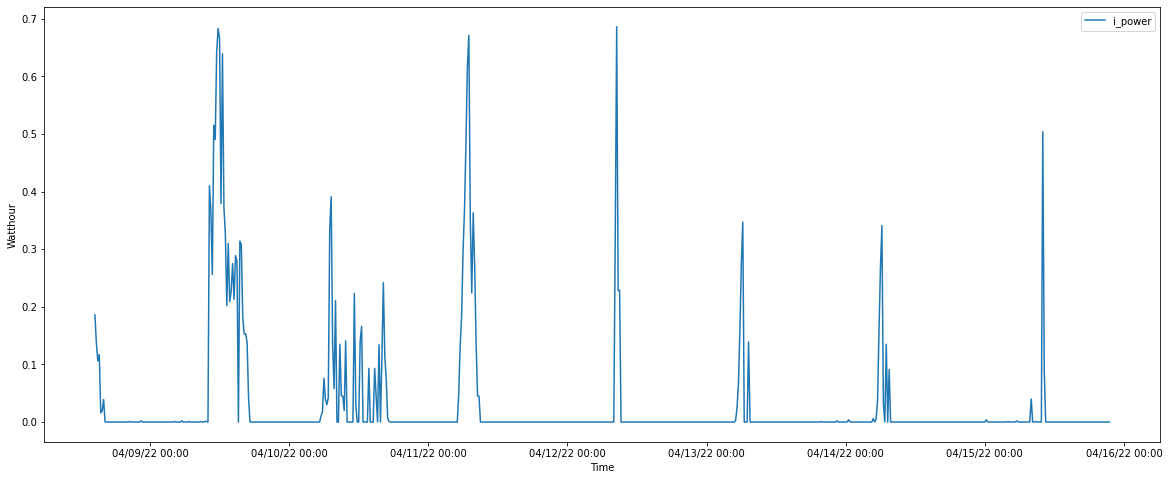

In [54]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

ax1.plot(date, power, label="i_power")

ax1.legend()

ax1.set_xlabel('15 min. Timesteps')
ax1.set_ylabel('Hot water tank temperature (°C)')

xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)


ax1.set_xlabel('Time')
ax1.set_ylabel('Watthour')
plt.show()

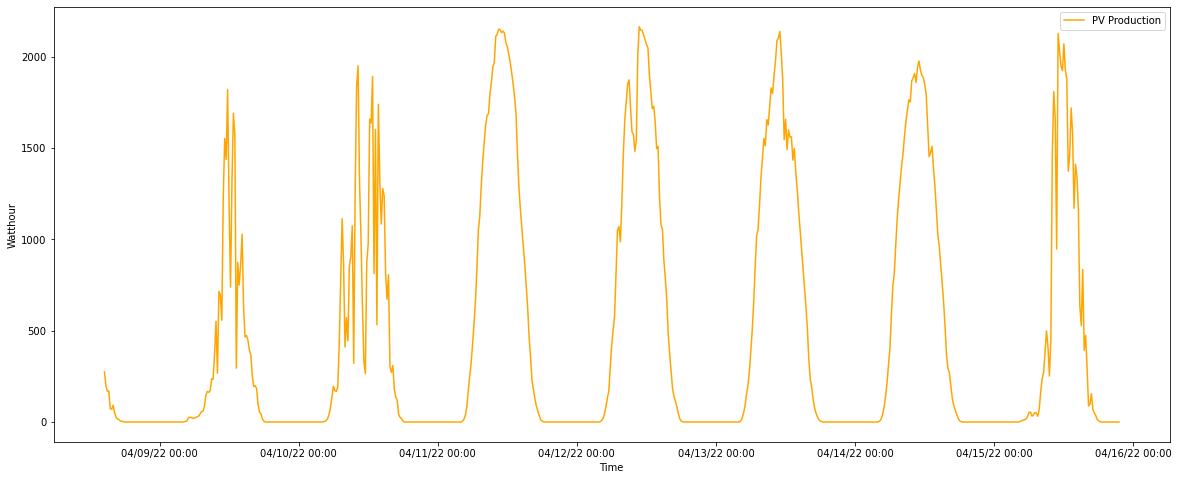

In [11]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

ax1.plot(date, m1sum, label="PV Production", color="orange")

ax1.legend()

ax1.set_xlabel('15 min. Timesteps')
ax1.set_ylabel('Hot water tank temperature (°C)')

xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

ax1.set_xlabel('Time')
ax1.set_ylabel('Watthour')
plt.show()

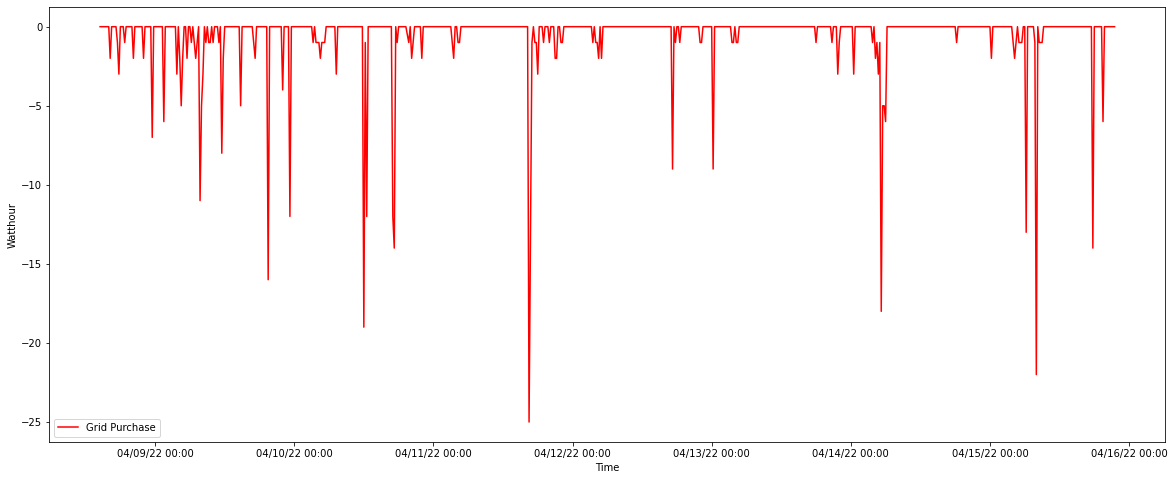

In [12]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

ax1.plot(date, metercons, label="Grid Purchase", color="red")

ax1.legend()

ax1.set_xlabel('15 min. Timesteps')
ax1.set_ylabel('Hot water tank temperature (°C)')

xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

ax1.set_xlabel('Time')
ax1.set_ylabel('Watthour')
plt.show()

In [ ]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

ax1.plot(date, meterfeed, label="Grid Feed-in", color="orange")

ax1.legend()

xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

ax1.set_xlabel('Time')
ax1.set_ylabel('Watthour')
plt.show()

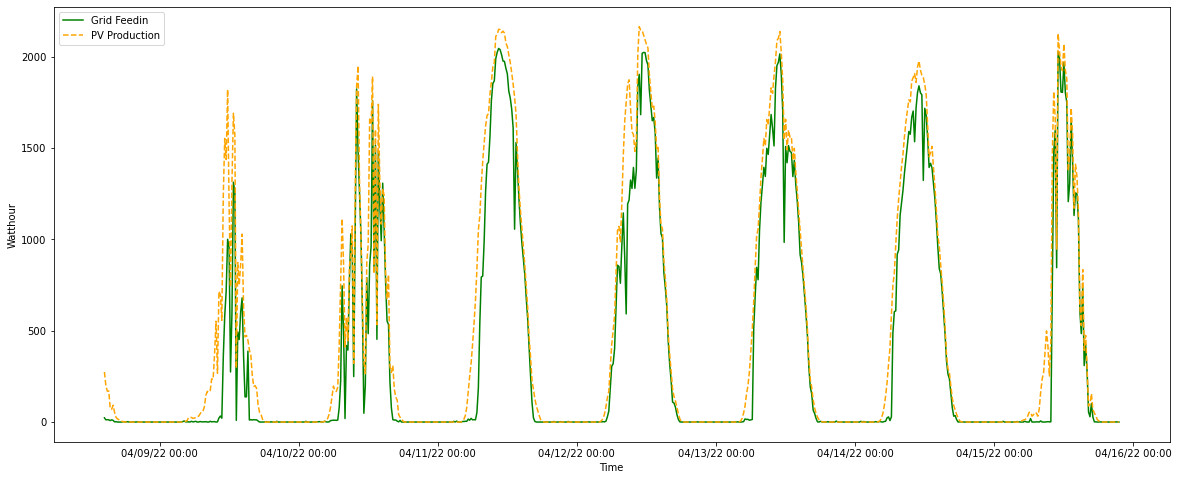

In [13]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

ax1.plot(date, meterfeed, label="Grid Feedin", color="green")
ax1.plot(date, m1sum, label="PV Production", color="orange", linestyle="dashed")

ax1.legend()

ax1.set_xlabel('15 min. Timesteps')
ax1.set_ylabel('Hot water tank temperature (°C)')

xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

ax1.set_xlabel('Time')
ax1.set_ylabel('Watthour')
plt.show()

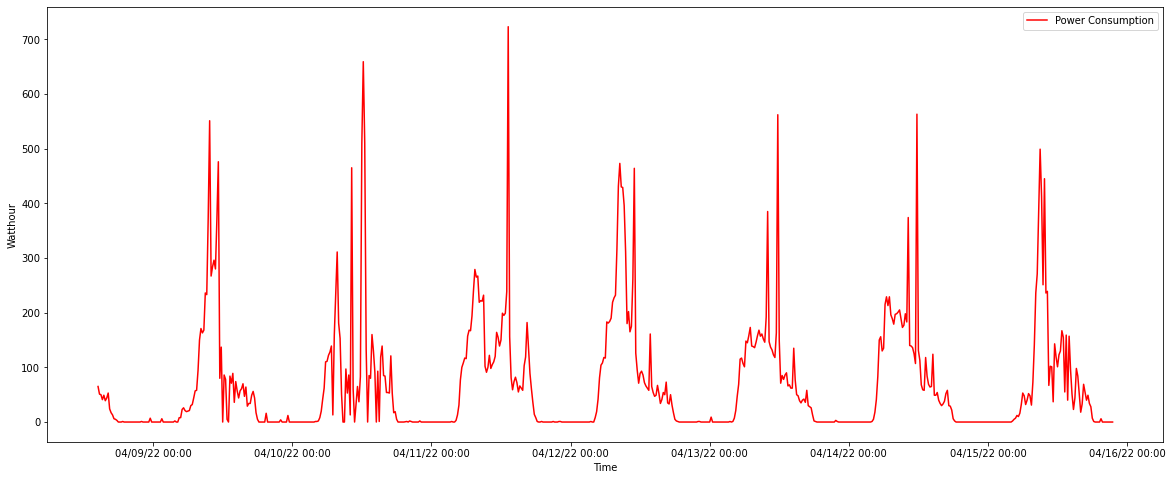

In [14]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

ax1.plot(date, power_consumption, label="Power Consumption", color="red")


ax1.legend()

ax1.set_xlabel('15 min. Timesteps')
ax1.set_ylabel('Hot water tank temperature (°C)')

xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

ax1.set_xlabel('Time')
ax1.set_ylabel('Watthour')
plt.show()

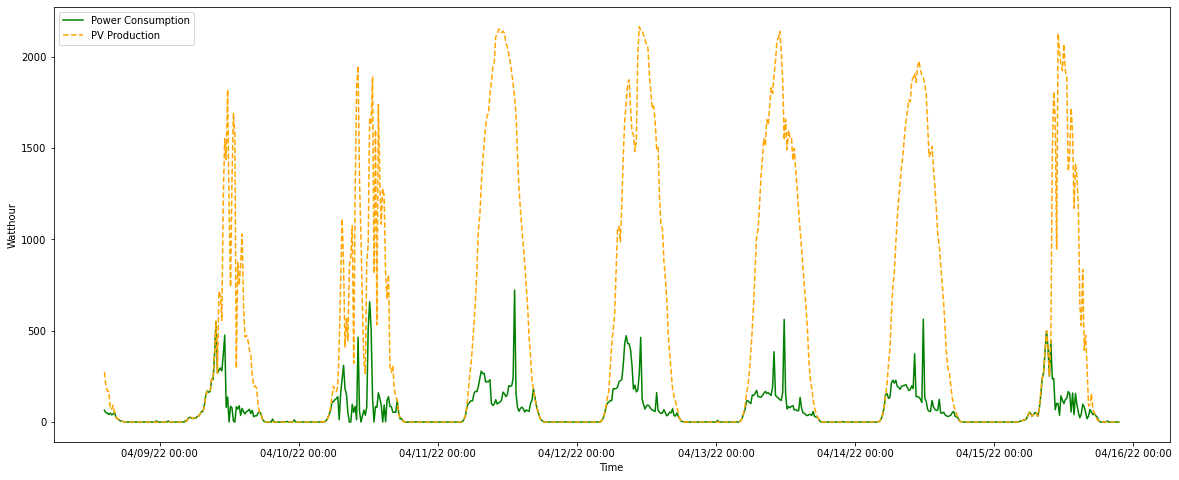

In [15]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

ax1.plot(date, power_consumption, label="Power Consumption", color="green")
ax1.plot(date, m1sum, label="PV Production", color="orange", linestyle="dashed")


ax1.legend()

ax1.set_xlabel('15 min. Timesteps')
ax1.set_ylabel('Hot water tank temperature (°C)')

xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

ax1.set_xlabel('Time')
ax1.set_ylabel('Watthour')
plt.show()

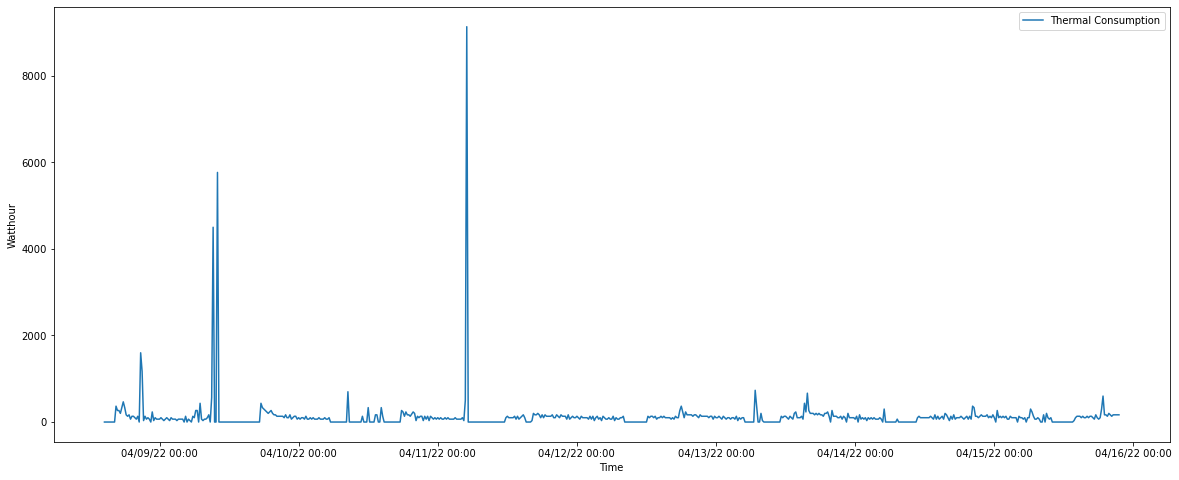

In [16]:
fig, ax1 = plt.subplots()

ax1.plot(date,thermal_consumption, label = "Thermal Consumption")

ax1.legend()


xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)


ax1.set_xlabel('Time')
ax1.set_ylabel('Watthour')
plt.savefig('foo.png')

plt.show()

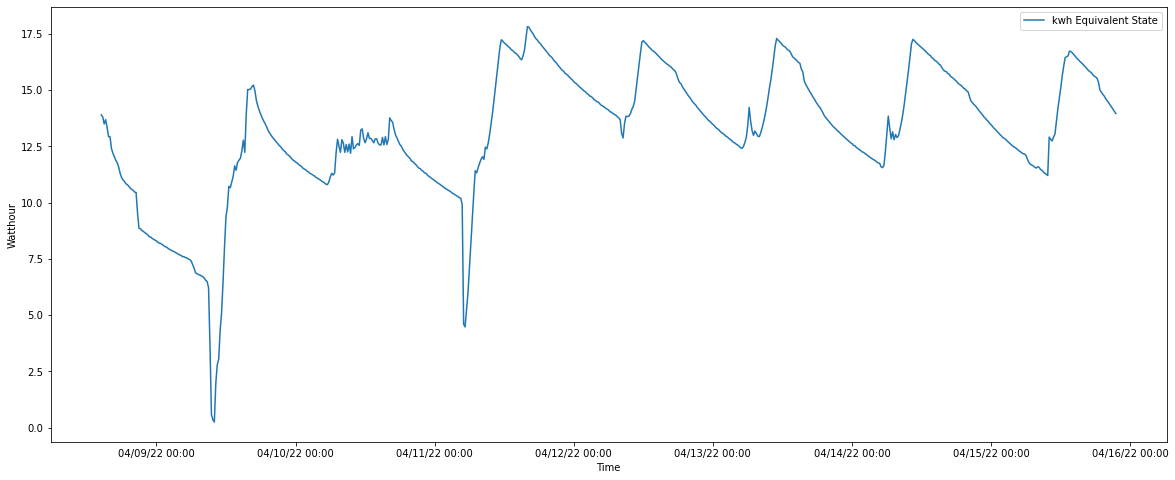

In [17]:
fig, ax1 = plt.subplots()

ax1.plot(date, kwh_eq_state, label = "kwh Equivalent State")

ax1.legend()


xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)


ax1.set_xlabel('Time')
ax1.set_ylabel('Watthour')
plt.savefig('foo.png')

plt.show()

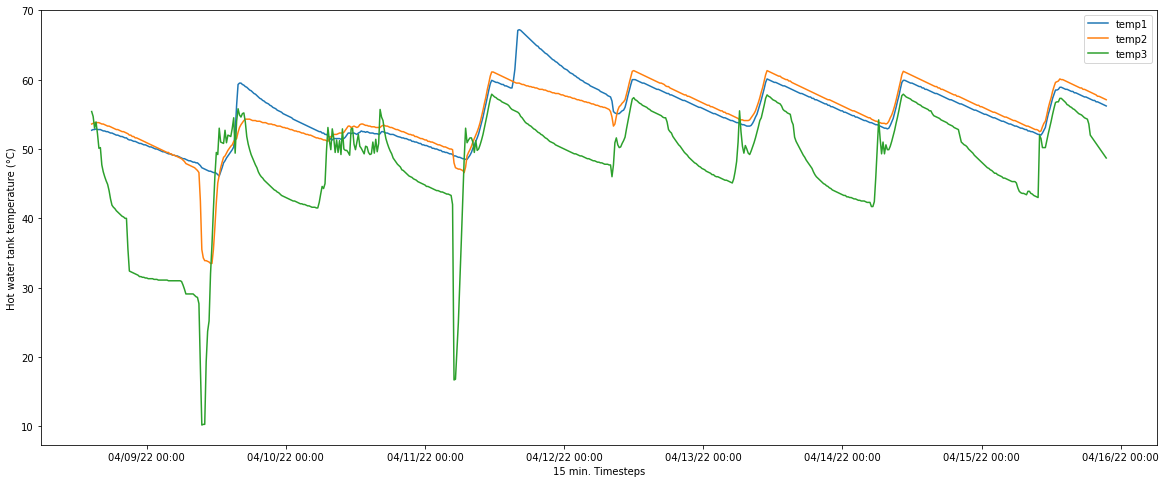

In [55]:
fig, ax1 = plt.subplots()

ax1.plot(date,temp1, label = "temp1")
ax1.plot(date, temp2, label = "temp2")
ax1.plot(date, temp3, label = "temp3")
ax1.legend()


ax1.set_xlabel('15 min. Timesteps')
ax1.set_ylabel('Hot water tank temperature (°C)')

xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

plt.savefig('foo.png')

plt.show()

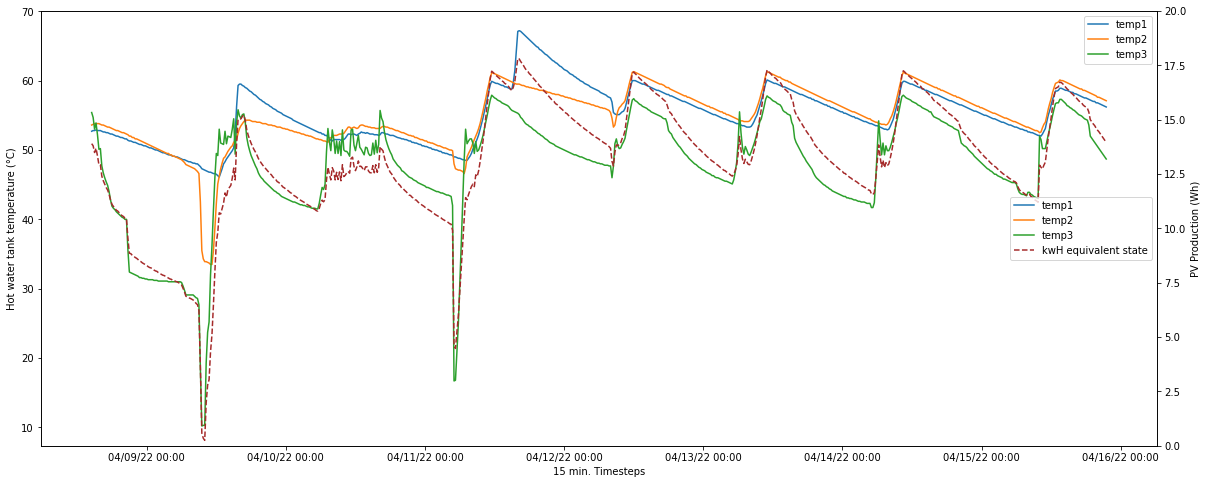

In [57]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(date,temp1, label = "temp1")
ax1.plot(date, temp2, label = "temp2")
ax1.plot(date, temp3, label = "temp3")
ax1.legend()
ax2.plot(date, kwh_eq_state, label= "kWh equivalent state",linestyle='dashed', color="brown")
ax2.axis(ymin=0,ymax=20)


xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)


ax1.set_xlabel('15 min. Timesteps')
ax1.set_ylabel('Hot water tank temperature (°C)')
ax2.set_ylabel('PV Production (Wh)')
plt.savefig('foo.png')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.show()

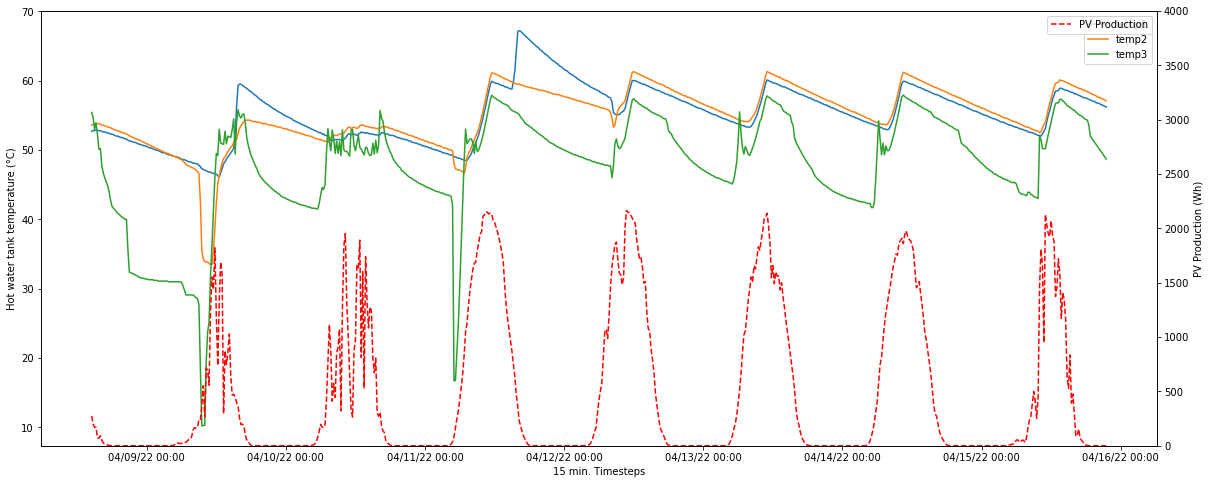

In [20]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(date,temp1, label = "temp1")
ax1.plot(date, temp2, label = "temp2")
ax1.plot(date, temp3, label = "temp3")
ax1.legend()
ax2.plot(date, m1sum, label= "PV Production",linestyle='dashed', color="red")
ax2.axis(ymin=0,ymax=4000)
ax2.legend()

xformatter = mdates.DateFormatter('%D %H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)


ax1.set_xlabel('15 min. Timesteps')
ax1.set_ylabel('Hot water tank temperature (°C)')
ax2.set_ylabel('PV Production (Wh)')
plt.savefig('foo.png')

plt.show()